In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gov_emp = pd.read_csv('Government_Employees_Demograpy.csv')

In [3]:
dav_pop_gender_age = pd.read_csv('Davidson_Demo_Age&Sex.csv')

In [4]:
dav_pop_race = pd.read_csv('dav_pop_race.csv')

In [5]:
dav_pop_gender_age.head(10)

,Age,Male,Female
0,0-9,42302,40585
1,10-19,36728,37965
2,20-29,58988,65833
3,30-39,66679,62941
4,40-49,40394,43907
5,50-59,37504,39648
6,60-69,32732,39843
7,70-79,20274,23710
8,80+,6193,11918


In [6]:
#dav_pop_gender_age.to_csv('dav_pop_gender_age.csv',index=False)

In [7]:
dav_pop_race = dav_pop_race.sort_values(by = 'Total',ascending = False)
dav_pop_race

,Race,Total,race_pct
0,White,393994,56%
1,Black,176918,25%
2,Hispanic,77518,11%
3,Two or more,30586,4%
4,Asian,25038,4%
5,Other,3588,1%
6,Islander,408,0%
7,Native,94,0%


In [8]:
#Calculate the total population for davidson county
total_population = dav_pop_race['Total'].sum()
total_population

708144

In [9]:
dav_pop_race['race_pct'] = (dav_pop_race['Total']/total_population*100).round().astype(int).astype(int)


In [10]:
dav_pop_race

,Race,Total,race_pct
0,White,393994,56
1,Black,176918,25
2,Hispanic,77518,11
3,Two or more,30586,4
4,Asian,25038,4
5,Other,3588,1
6,Islander,408,0
7,Native,94,0


In [11]:
#dav_pop_race.to_csv('dav_pop_race.csv',index=False)

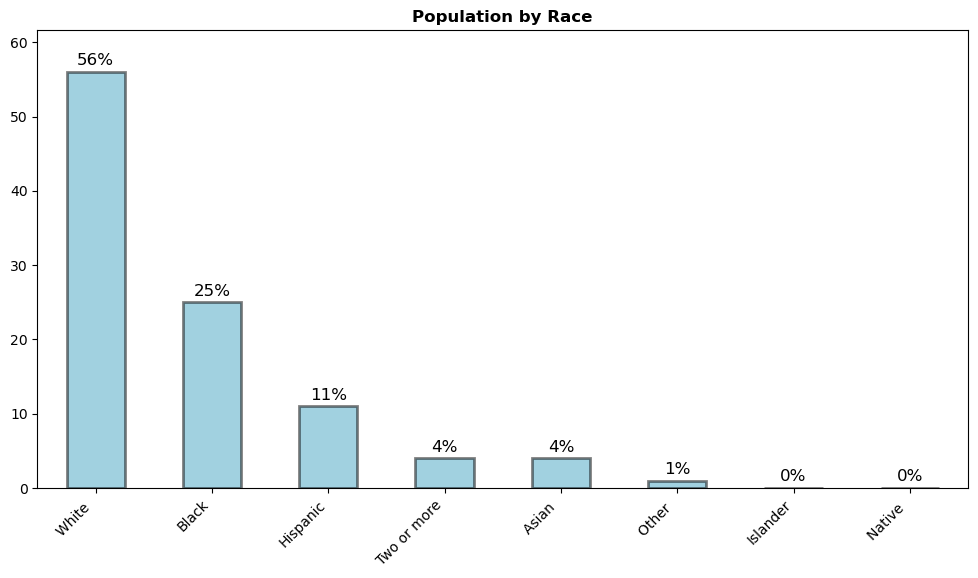

In [12]:
color = ["#44a5c2"]
ax = dav_pop_race.plot(kind='bar', x = 'Race',y='race_pct', figsize = (10,6), color=color, alpha=0.5, edgecolor='black', linewidth=2,legend = False)
plt.xlabel('',weight='bold')
#plt.ylabel('Population',weight='bold')
#ax.bar_label(ax.containers[0], fontsize=12, weight = 'bold')
for i, (race, pct) in enumerate(zip(dav_pop_race['Race'], dav_pop_race['race_pct'])):
    plt.text(i, pct + 0.5, f"{pct:.0f}%", ha='center', va='bottom', fontsize=12)

plt.xticks(rotation = 45, ha='right')
plt.title('Population by Race', weight='bold')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.ylim(0, max(dav_pop_race['race_pct']) * 1.1)
plt.show()

In [13]:
dav_pop_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Race      8 non-null      object
 1   Total     8 non-null      int64 
 2   race_pct  8 non-null      int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 292.0+ bytes


In [14]:
# Only want ages above 15 (youngest gov worker in dataset)
#dav_pop_gender_age = dav_pop_gender_age.iloc[:]

In [15]:
dav_pop_gender_age

,Age,Male,Female
0,0-9,42302,40585
1,10-19,36728,37965
2,20-29,58988,65833
3,30-39,66679,62941
4,40-49,40394,43907
5,50-59,37504,39648
6,60-69,32732,39843
7,70-79,20274,23710
8,80+,6193,11918


In [16]:
# # create age range column
# bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
# labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
# dav_pop_gender_age['Age'] = pd.cut(dav_pop_gender_age.Age, bins, labels = labels, right=False)

In [17]:
#Male population
(dav_pop_gender_age['Male'].sum()/total_population*100).round(0)

48.0

In [18]:
#Female population
(dav_pop_gender_age['Female'].sum()/total_population*100).round(0)

52.0

<Figure size 2000x1200 with 0 Axes>

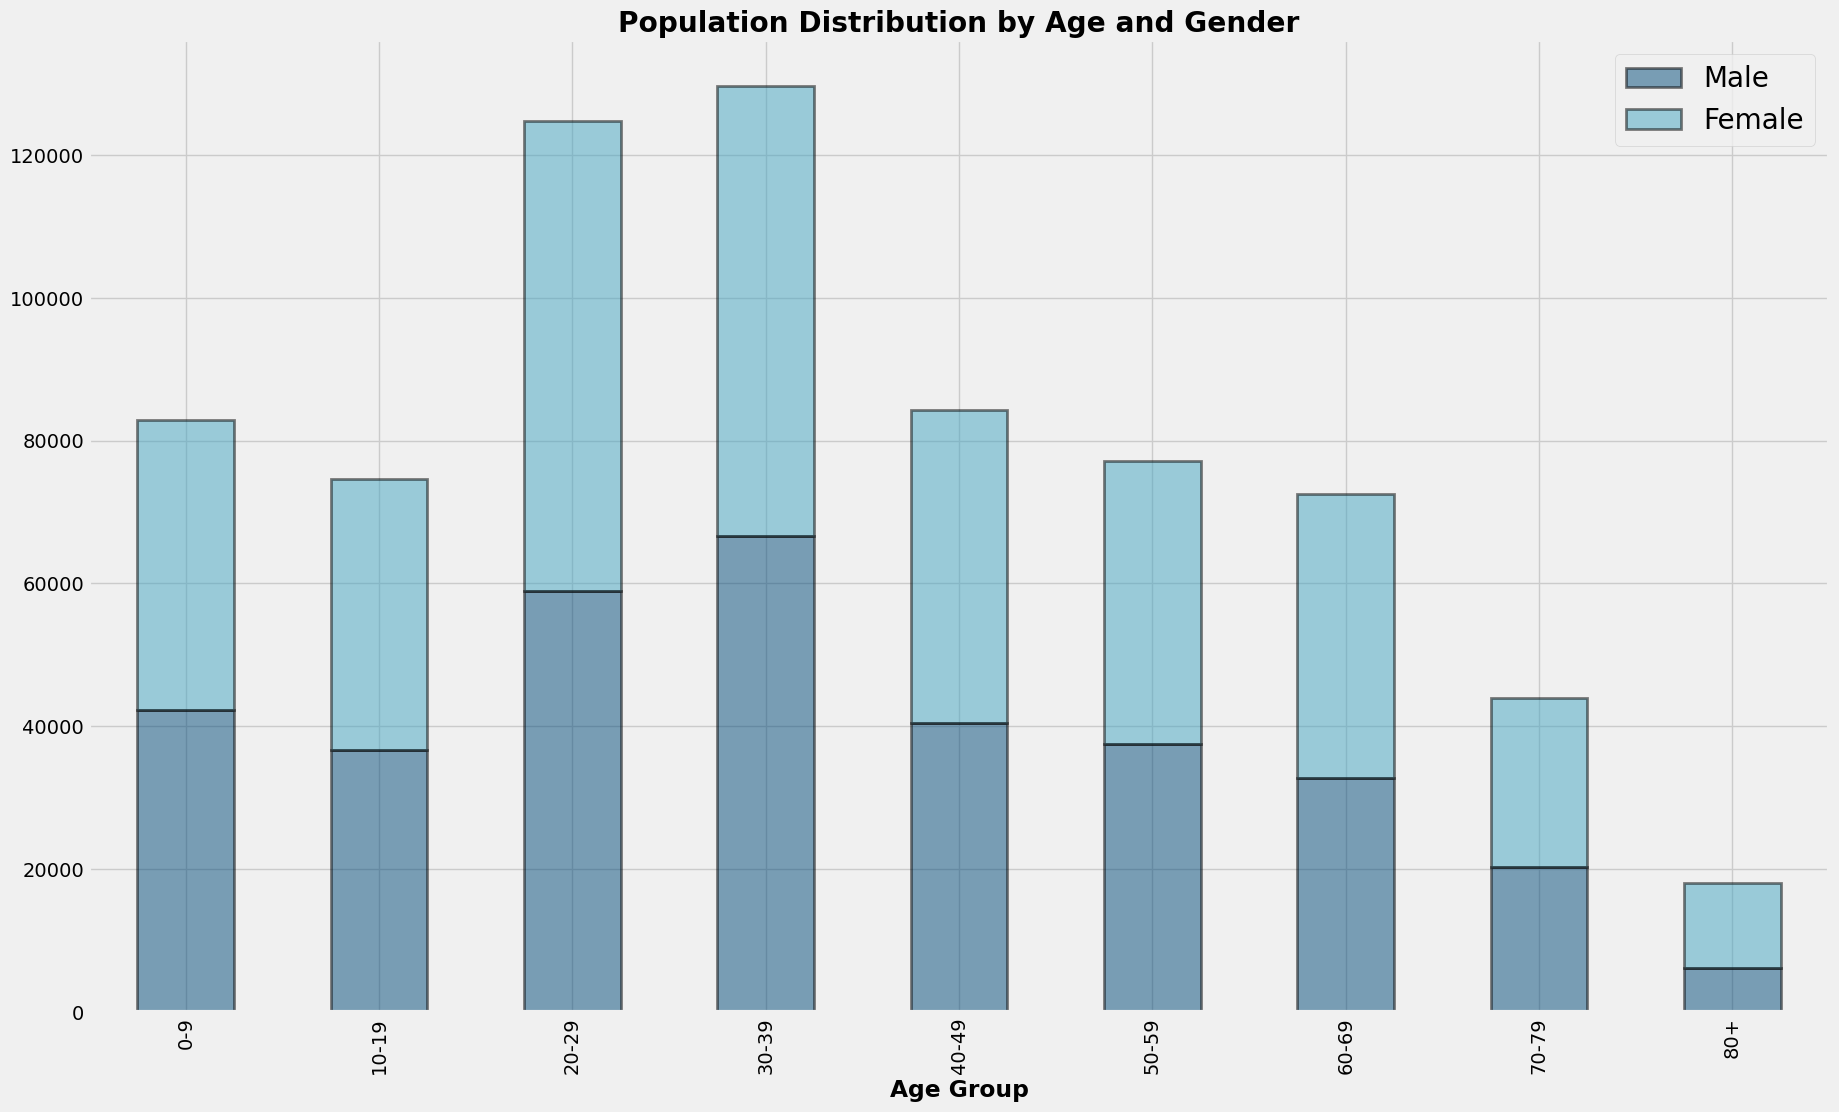

In [19]:
plt.figure(figsize=(20, 12))
color = ["#024b7a", "#44a5c2"]
dav_pop_gender_age.plot(kind = 'bar',x='Age', figsize = (20,12),stacked =True, color=color, alpha=0.5, edgecolor='black', linewidth=2)
plt.xlabel('Age Group',weight='bold')
#plt.ylabel('Population',weight='bold')
plt.title('Population Distribution by Age and Gender',weight='bold')
plt.xticks(rotation=90)
plt.legend(fontsize=20)
plt.style.use('fivethirtyeight')
plt.show()

In [20]:
#bring the gov_employee data here
gov_emp.head()


,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County
0,OR06,43390.46,7757,Technical Specialist 2,Police,Parttime,Professionals,M,White,1950,7/16/1972,Y,Davidson
1,OR04,72688.60,7753,Professional Spec,Police,Fulltime,Professionals,F,White,1952,8/18/1972,Y,Davidson
2,OR07,113468.17,7242,Admin Svcs Mgr,Water Services,Fulltime,Officials and administrators,M,Black or African American,1950,2/26/1973,Y,Davidson
3,OR09,121002.72,10863,Admin Svcs Division Manager,Metropolitan Council,Fulltime,Officials and administrators,F,White,1956,9/1/1974,Y,Davidson
4,FD03,76225.40,11172,Advanced Emergency Med Tech,Fire,Fulltime,Technicians,M,White,1954,11/1/1974,N,Wilson


In [21]:
gov_emp.shape

(10782, 13)

In [22]:
#gov_emp.info()

In [23]:
#change the Date Started column to datetime
gov_emp['Date Started'] = pd.to_datetime(gov_emp['Date Started'])


In [24]:
gov_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10782 entries, 0 to 10781
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Pay Grade / Step              10782 non-null  object        
 1   Annual Salary                 10693 non-null  float64       
 2   Class                         10782 non-null  int64         
 3   Title                         10782 non-null  object        
 4   Current Department            10782 non-null  object        
 5   Employment Status             10782 non-null  object        
 6   EEO Job Category Description  10782 non-null  object        
 7   Gender                        10782 non-null  object        
 8   Ethnic Code Description       10782 non-null  object        
 9   Year of Birth                 10782 non-null  int64         
 10  Date Started                  10782 non-null  datetime64[ns]
 11  FLSA Exempt?                

In [25]:
#create a current year column
gov_emp['Current_Year'] = pd.Timestamp('now').year

In [26]:
gov_emp

,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County,Current_Year
0,OR06,43390.46,7757,Technical Specialist 2,Police,Parttime,Professionals,M,White,1950,1972-07-16,Y,Davidson,2024
1,OR04,72688.60,7753,Professional Spec,Police,Fulltime,Professionals,F,White,1952,1972-08-18,Y,Davidson,2024
2,OR07,113468.17,7242,Admin Svcs Mgr,Water Services,Fulltime,Officials and administrators,M,Black or African American,1950,1973-02-26,Y,Davidson,2024
3,OR09,121002.72,10863,Admin Svcs Division Manager,Metropolitan Council,Fulltime,Officials and administrators,F,White,1956,1974-09-01,Y,Davidson,2024
4,FD03,76225.40,11172,Advanced Emergency Med Tech,Fire,Fulltime,Technicians,M,White,1954,1974-11-01,N,Wilson,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10777,PS01,54900.89,3257,Police Officer Trainee,Police,Fulltime,Protective service workers,M,Two or More Races,2001,2024-04-01,N,Davidson,2024
10778,PS01,54900.89,3257,Police Officer Trainee,Police,Fulltime,Protective service workers,M,White,1989,2024-04-01,N,Montgomery,2024
10779,PS01,54900.89,3257,Police Officer Trainee,Police,Fulltime,Protective service workers,F,Hispanic or Latino of any race,2001,2024-04-01,N,Davidson,2024
10780,PS01,54900.89,3257,Police Officer Trainee,Police,Fulltime,Protective service workers,F,Black or African American,2000,2024-04-01,N,Davidson,2024


In [27]:
#Change long names to short ones and check the unique values under EEO Job Category Description column
gov_emp.replace({'Ethnic Code Description':{'White':'White','Black or African American': 'Black', 'Hispanic or Latino of any race': 'Hispanic','Two or More Races':'Two or more',
                   'Asian':'Asian','Native Hawaiian or Other Pacific':'Native','American Indian or Alaskan Native':'Islander'}},inplace = True)

gov_emp.replace({'EEO Job Category Description':{'Administrative support (including clerical and sales)':'Administrative support'}},inplace = True)
gov_emp['EEO Job Category Description'].unique()

array(['Professionals', 'Officials and administrators', 'Technicians',
       'Administrative support', 'Paraprofessionals',
       'Protective service workers', 'Service/Maintenance',
       'Skilled craft workers'], dtype=object)

In [28]:
# creatw Age column and start Age analysis
gov_emp['Age']= (gov_emp['Current_Year'] - gov_emp['Year of Birth'])

In [29]:
gov_emp['Age']

0        74
1        72
2        74
3        68
4        70
         ..
10777    23
10778    35
10779    23
10780    24
10781    36
Name: Age, Length: 10782, dtype: int64

In [30]:
gov_emp['Age'].mean()

44.357354850677055

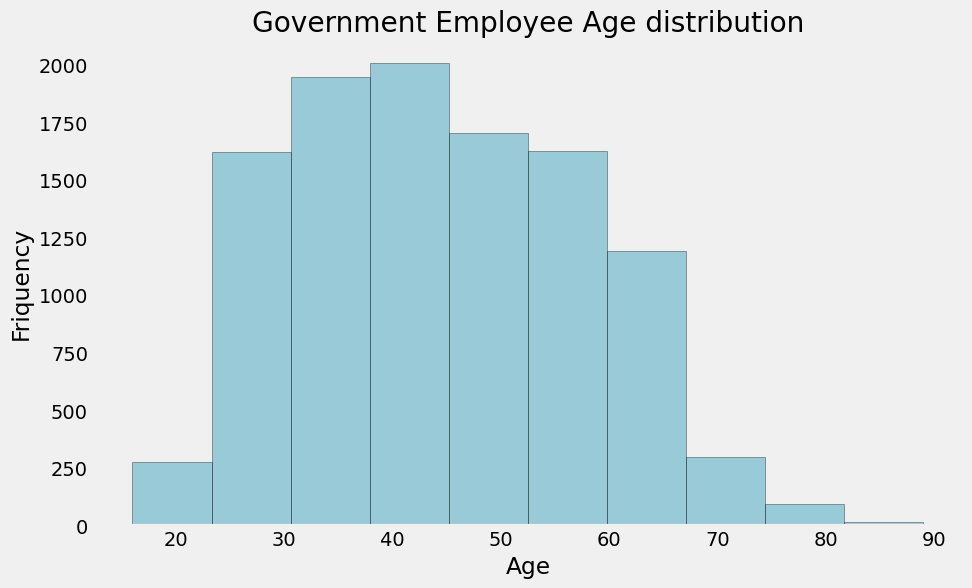

In [31]:
#calculate the age distribution
gov_emp['Age'].hist(figsize = (10,6), color = '#44a5c2',edgecolor = 'black', alpha=0.5, grid=False)
plt.title('Government Employee Age distribution')
plt.xlabel('Age')
plt.ylabel('Friquency')
plt.style.use('fivethirtyeight')
plt.show()

#color = ["#024b7a", "#44a5c2"]


In [32]:
# create age range column
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 100]
labels = ['15-19 ', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85+']
gov_emp['Age_Group'] = pd.cut(gov_emp.Age, bins, labels = labels, right=False)

In [33]:
gov_emp_by_AgeGroup = gov_emp.groupby('Age_Group').size()

C:\Users\zenas\AppData\Local\Temp\ipykernel_32776\1340970423.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gov_emp_by_AgeGroup = gov_emp.groupby('Age_Group').size()


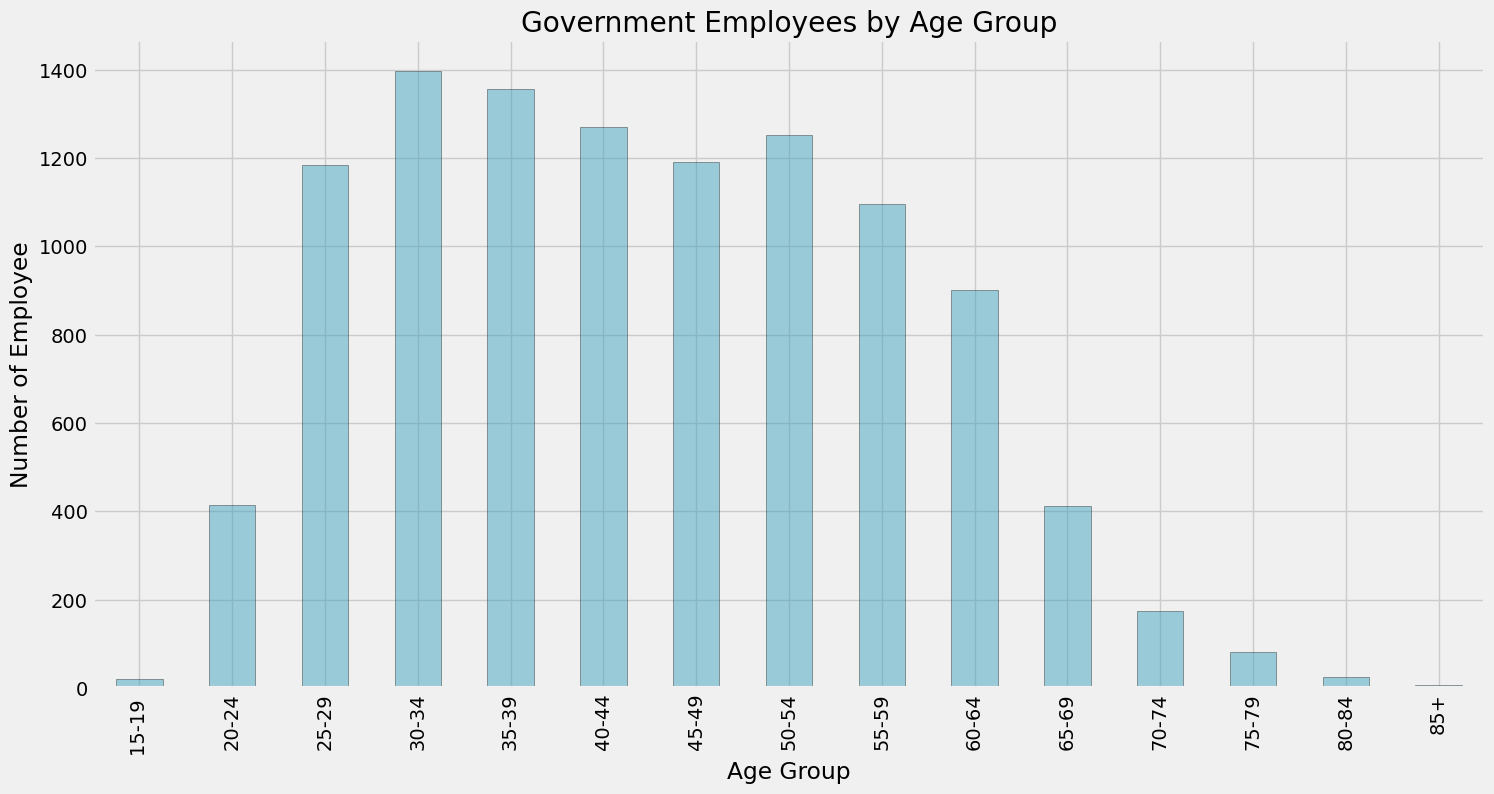

In [34]:

gov_emp_by_AgeGroup.plot(kind='bar', figsize = (16,8),
                         title = 'Government Employees by Age Group',
                         ylabel = 'Number of Employee',
                        xlabel = 'Age Group',
                        color='#44a5c2',
                        edgecolor='black',
                        alpha=0.5)
plt.style.use('fivethirtyeight')
plt.show()

In [35]:
gov_emp.groupby('Age')['Annual Salary'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
16,3.0,7592.00,1981.47,5304.00,7020.00,8736.00,8736.00,8736.00
17,2.0,1081.34,341.59,839.80,960.57,1081.34,1202.11,1322.88
18,2.0,19173.07,5935.55,14976.00,17074.53,19173.07,21271.60,23370.13
19,12.0,28735.81,14757.10,0.00,19765.91,30025.28,40826.33,45760.00
20,38.0,28798.73,16823.75,0.00,19549.84,36199.80,42425.32,51011.48
...,...,...,...,...,...,...,...,...
85,1.0,15940.08,NaN,15940.08,15940.08,15940.08,15940.08,15940.08
86,1.0,2045.47,NaN,2045.47,2045.47,2045.47,2045.47,2045.47
87,2.0,24976.28,7875.95,19407.14,22191.71,24976.28,27760.85,30545.42


In [36]:
salary_by_age = gov_emp.groupby('Age')['Annual Salary'].mean().round(2)

In [37]:
salary_by_age

Age
16     7592.00
17     1081.34
18    19173.07
19    28735.81
20    28798.73
        ...   
85    15940.08
86     2045.47
87    24976.28
88    27304.37
89     8543.89
Name: Annual Salary, Length: 74, dtype: float64

In [38]:
gov_emp.groupby('Annual Salary')['Age'].mean().reset_index()

,Annual Salary,Age
0,0.00,39.19403
1,691.39,61.00000
2,800.48,47.00000
3,839.80,17.00000
4,1103.25,21.00000
...,...,...
2641,254769.89,60.00000
2642,265588.15,60.00000
2643,276162.35,65.00000
2644,297625.23,60.00000


In [39]:
#create a started year column 
#calculate year of service
gov_emp['Started_Year'] = gov_emp['Date Started'].dt.year

In [40]:
gov_emp.head()

,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County,Current_Year,Age,Age_Group,Started_Year
0,OR06,43390.46,7757,Technical Specialist 2,Police,Parttime,Professionals,M,White,1950,1972-07-16,Y,Davidson,2024,74,70-74,1972
1,OR04,72688.60,7753,Professional Spec,Police,Fulltime,Professionals,F,White,1952,1972-08-18,Y,Davidson,2024,72,70-74,1972
2,OR07,113468.17,7242,Admin Svcs Mgr,Water Services,Fulltime,Officials and administrators,M,Black,1950,1973-02-26,Y,Davidson,2024,74,70-74,1973
3,OR09,121002.72,10863,Admin Svcs Division Manager,Metropolitan Council,Fulltime,Officials and administrators,F,White,1956,1974-09-01,Y,Davidson,2024,68,65-69,1974
4,FD03,76225.40,11172,Advanced Emergency Med Tech,Fire,Fulltime,Technicians,M,White,1954,1974-11-01,N,Wilson,2024,70,70-74,1974


In [41]:
#create a Year Of Service column to see the distribution across all depts.
gov_emp['Year_Of_Service'] = gov_emp['Current_Year']-gov_emp['Started_Year']

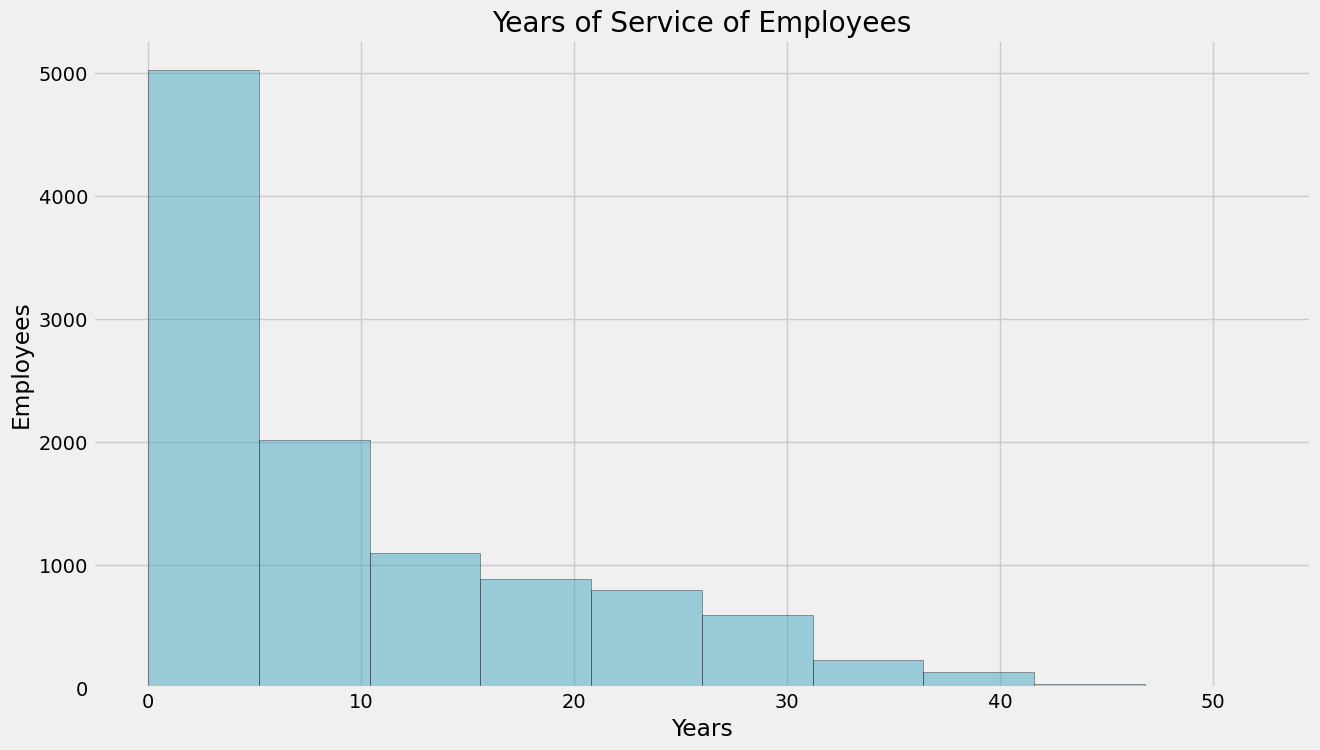

In [42]:
plt.figure(figsize=(14, 8))
# plt.style.use('default')
gov_emp['Year_Of_Service'].hist(edgecolor='black', color='#44a5c2', alpha=0.5)
plt.title('Years of Service of Employees')
plt.xlabel('Years')
plt.ylabel('Employees')
plt.style.use('fivethirtyeight')

In [43]:
gov_emp.groupby('Ethnic Code Description')['Year_Of_Service'].mean().reset_index().round(0)

,Ethnic Code Description,Year_Of_Service
0,Asian,8.0
1,Black,9.0
2,Hispanic,7.0
3,Islander,11.0
4,Native,5.0
5,Two or more,8.0
6,White,10.0


In [44]:
gov_emp[gov_emp['Year_Of_Service']==52]

,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County,Current_Year,Age,Age_Group,Started_Year,Year_Of_Service
0,OR06,43390.46,7757,Technical Specialist 2,Police,Parttime,Professionals,M,White,1950,1972-07-16,Y,Davidson,2024,74,70-74,1972,52
1,OR04,72688.60,7753,Professional Spec,Police,Fulltime,Professionals,F,White,1952,1972-08-18,Y,Davidson,2024,72,70-74,1972,52


In [45]:
gov_emp_by_county = gov_emp.groupby('County')['Pay Grade / Step'].count().sort_values(ascending = False).reset_index()
gov_emp_by_county = gov_emp_by_county.nlargest(10, 'Pay Grade / Step')
gov_emp_by_county = gov_emp_by_county.rename(columns = {'Pay Grade / Step':'Total Employees'})
gov_emp_by_county = gov_emp_by_county[0:10].sort_values(by='Total Employees')

In [46]:
gov_emp_by_county

,County,Total Employees
9,Maury,101
8,Dickson,212
7,Cheatham,398
6,Montgomery,410
5,Williamson,514
4,Robertson,535
3,Wilson,731
2,Rutherford,944
1,Sumner,1014
0,Davidson,5656


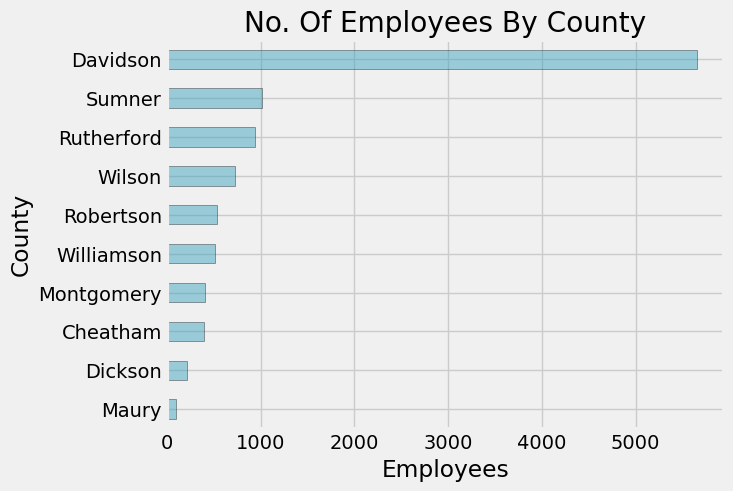

In [47]:
gov_emp_by_county.plot(kind = 'barh',   x= 'County' , 
                       title = 'No. Of Employees By County',
                       xlabel = 'Employees', 
                       ylabel = 'County', 
                       legend = False,
                       color='#44a5c2', 
                       alpha=0.5,
                       edgecolor = 'black' 
                      )
plt.show()

In [48]:
#gov_emp.groupby('County')['Annual Salary'].max().reset_index()

In [49]:
gov_emp['Annual Salary'].max()

387989.6

In [50]:
gov_emp[gov_emp['Annual Salary']==387989.60]

,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County,Current_Year,Age,Age_Group,Started_Year,Year_Of_Service
2010,CA12,387989.6,10663,President/CEO-Conv Center,Convention Center Authority,Fulltime,Officials and administrators,M,White,1960,2005-03-30,Y,Wilson,2024,64,60-64,2005,19


In [51]:
gov_emp['Annual Salary'].min()

0.0

In [52]:
gov_emp[gov_emp['Annual Salary']==0.0]

,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County,Current_Year,Age,Age_Group,Started_Year,Year_Of_Service
3851,NS,0.0,9108,Sports Official,Parks,Pool,Service/Maintenance,M,White,1958,2014-04-02,N,Davidson,2024,66,65-69,2014,10
5289,NS,0.0,9108,Sports Official,Parks,Pool,Service/Maintenance,M,White,1995,2017-11-24,N,Davidson,2024,29,25-29,2017,7
5509,NS,0.0,9020,Seasonal/Part-time/Temporary,Parks,Pool,Service/Maintenance,F,White,1995,2018-05-25,N,Davidson,2024,29,25-29,2018,6
5963,NS,0.0,9020,Seasonal/Part-time/Temporary,Parks,Pool,Service/Maintenance,F,White,1998,2019-06-14,N,Davidson,2024,26,25-29,2019,5
7005,NS,0.0,9108,Sports Official,Parks,Pool,Service/Maintenance,M,White,1996,2021-06-23,N,Davidson,2024,28,25-29,2021,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10106,NS,0.0,9020,Seasonal/Part-time/Temporary,Parks,Pool,Service/Maintenance,M,White,1995,2023-11-13,N,Rutherford,2024,29,25-29,2023,1
10272,NS,0.0,9020,Seasonal/Part-time/Temporary,Parks,Pool,Service/Maintenance,F,White,1996,2023-12-22,N,Davidson,2024,28,25-29,2023,1
10273,NS,0.0,9020,Seasonal/Part-time/Temporary,Parks,Pool,Service/Maintenance,F,Black,1974,2023-12-22,N,Davidson,2024,50,50-54,2023,1
10671,NS,0.0,9020,Seasonal/Part-time/Temporary,Parks,Pool,Service/Maintenance,M,Two or more,2005,2024-03-11,N,Sumner,2024,19,15-19,2024,0


In [53]:
gov_emp['Date Started'].max()

Timestamp('2024-04-01 00:00:00')

In [54]:
gov_emp['Date Started'].min()

Timestamp('1972-07-16 00:00:00')

In [55]:
gov_emp[gov_emp['Date Started']=='1972-07-16 00:00:00']

,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County,Current_Year,Age,Age_Group,Started_Year,Year_Of_Service
0,OR06,43390.46,7757,Technical Specialist 2,Police,Parttime,Professionals,M,White,1950,1972-07-16,Y,Davidson,2024,74,70-74,1972,52


In [56]:
gov_emp.groupby('Current Department')['Annual Salary'].mean().round(2).reset_index()
gov_emp_by_dept = gov_emp.nlargest(20, 'Annual Salary')
gov_emp_by_dept.head()

,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County,Current_Year,Age,Age_Group,Started_Year,Year_Of_Service
2010,CA12,387989.60,10663,President/CEO-Conv Center,Convention Center Authority,Fulltime,Officials and administrators,M,White,1960,2005-03-30,Y,Wilson,2024,64,60-64,2005,19
1397,DP02,297625.23,1670,Water Svcs Dir,Water Services,Fulltime,Officials and administrators,M,White,1964,2001-10-15,Y,Davidson,2024,60,60-64,2001,23
5068,NS,276162.35,1080,Chief Medical Dir,Health,Fulltime,Officials and administrators,M,White,1959,2017-05-30,Y,Davidson,2024,65,65-69,2017,7
170,DP02,265588.15,1110,Police Chief,Police,Fulltime,Officials and administrators,M,Black,1964,1988-03-16,Y,Wilson,2024,60,60-64,1988,36
7474,DP02,254769.89,11121,Transportation Director,NDOT,Fulltime,Officials and administrators,F,White,1964,2022-01-10,Y,Davidson,2024,60,60-64,2022,2


In [57]:
gov_emp_category = gov_emp.groupby('EEO Job Category Description')['Gender'].value_counts().unstack()
gov_emp_category['Total'] = gov_emp_category['M'] + gov_emp_category['F']
gov_emp_category['Female(%)'] = (gov_emp_category['F'] / gov_emp_category['Total'] * 100).round(2)
gov_emp_category['Male(%)'] = (gov_emp_category['M'] / gov_emp_category['Total'] * 100).round(2)
gov_emp_category

Gender,F,M,Total,Female(%),Male(%)
EEO Job Category Description,,,,,
Administrative support,769,382,1151,66.81,33.19
Officials and administrators,434,631,1065,40.75,59.25
Paraprofessionals,289,166,455,63.52,36.48
Professionals,1739,1345,3084,56.39,43.61
Protective service workers,495,1894,2389,20.72,79.28
Service/Maintenance,271,758,1029,26.34,73.66
Skilled craft workers,18,275,293,6.14,93.86
Technicians,240,1076,1316,18.24,81.76


In [58]:
gov_emp['Annual Salary'].sort_values(ascending = False)

2010    387989.60
1397    297625.23
5068    276162.35
170     265588.15
7474    254769.89
          ...    
6791          NaN
6914          NaN
9029          NaN
9707          NaN
9715          NaN
Name: Annual Salary, Length: 10782, dtype: float64

In [59]:
gov_emp.isna().sum()

Pay Grade / Step                 0
Annual Salary                   89
Class                            0
Title                            0
Current Department               0
Employment Status                0
EEO Job Category Description     0
Gender                           0
Ethnic Code Description          0
Year of Birth                    0
Date Started                     0
FLSA Exempt?                     9
County                           0
Current_Year                     0
Age                              0
Age_Group                        0
Started_Year                     0
Year_Of_Service                  0
dtype: int64

In [60]:
#check NaN values
#gov_emp[gov_emp.isna().any(axis=1)]


In [61]:
gov_emp.groupby('Employment Status').size()

Employment Status
Elected                61
Fulltime             9644
Intern / Student       16
Parttime              854
Pool                  152
Satellite (Quasi)       9
Seasonal               46
dtype: int64

In [62]:
gov_emp.head()

,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County,Current_Year,Age,Age_Group,Started_Year,Year_Of_Service
0,OR06,43390.46,7757,Technical Specialist 2,Police,Parttime,Professionals,M,White,1950,1972-07-16,Y,Davidson,2024,74,70-74,1972,52
1,OR04,72688.60,7753,Professional Spec,Police,Fulltime,Professionals,F,White,1952,1972-08-18,Y,Davidson,2024,72,70-74,1972,52
2,OR07,113468.17,7242,Admin Svcs Mgr,Water Services,Fulltime,Officials and administrators,M,Black,1950,1973-02-26,Y,Davidson,2024,74,70-74,1973,51
3,OR09,121002.72,10863,Admin Svcs Division Manager,Metropolitan Council,Fulltime,Officials and administrators,F,White,1956,1974-09-01,Y,Davidson,2024,68,65-69,1974,50
4,FD03,76225.40,11172,Advanced Emergency Med Tech,Fire,Fulltime,Technicians,M,White,1954,1974-11-01,N,Wilson,2024,70,70-74,1974,50


In [63]:
# gov_emp = gov_emp.reset_index()

In [64]:
#gov_emp.to_csv('gov_emp.csv',index=False)

# Davidson

In [65]:
# Davidson county only
gov_emp_davidson = gov_emp[gov_emp['County']=='Davidson']

In [66]:
gov_emp_davidson

,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County,Current_Year,Age,Age_Group,Started_Year,Year_Of_Service
0,OR06,43390.46,7757,Technical Specialist 2,Police,Parttime,Professionals,M,White,1950,1972-07-16,Y,Davidson,2024,74,70-74,1972,52
1,OR04,72688.60,7753,Professional Spec,Police,Fulltime,Professionals,F,White,1952,1972-08-18,Y,Davidson,2024,72,70-74,1972,52
2,OR07,113468.17,7242,Admin Svcs Mgr,Water Services,Fulltime,Officials and administrators,M,Black,1950,1973-02-26,Y,Davidson,2024,74,70-74,1973,51
3,OR09,121002.72,10863,Admin Svcs Division Manager,Metropolitan Council,Fulltime,Officials and administrators,F,White,1956,1974-09-01,Y,Davidson,2024,68,65-69,1974,50
5,NS,83001.18,6505,Deputy Criminal Ct Clerk 4,Criminal Court Clerk,Fulltime,Administrative support,F,White,1950,1975-12-05,N,Davidson,2024,74,70-74,1975,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10772,ST07,31818.99,6880,Recreation Leader,Parks,Parttime,Paraprofessionals,M,White,2000,2024-03-25,N,Davidson,2024,24,20-24,2024,0
10775,PS01,54900.89,3257,Police Officer Trainee,Police,Fulltime,Protective service workers,M,White,1997,2024-04-01,N,Davidson,2024,27,25-29,2024,0
10777,PS01,54900.89,3257,Police Officer Trainee,Police,Fulltime,Protective service workers,M,Two or more,2001,2024-04-01,N,Davidson,2024,23,20-24,2024,0
10779,PS01,54900.89,3257,Police Officer Trainee,Police,Fulltime,Protective service workers,F,Hispanic,2001,2024-04-01,N,Davidson,2024,23,20-24,2024,0


In [67]:
#gov_emp_davidson.groupby('Current Department')['Annual Salary'].mean().round(2).sort_values(ascending = False).reset_index()

In [68]:
#gov_emp_davidson.groupby('Current Department').size().sort_values(ascending = False)

In [69]:
#gov_emp_davidson.groupby('Current Department').size().sort_values(ascending = False)

In [70]:
#Find employment status
gov_emp_davidson['Employment Status'].value_counts()

Employment Status
Fulltime             4831
Parttime              584
Pool                  126
Elected                61
Seasonal               37
Intern / Student       11
Satellite (Quasi)       6
Name: count, dtype: int64

In [71]:
dav_fulltime_emp = gov_emp_davidson[gov_emp_davidson['Employment Status'] == 'Fulltime'].reset_index()
dav_fulltime_emp.head()

,index,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County,Current_Year,Age,Age_Group,Started_Year,Year_Of_Service
0,1,OR04,72688.60,7753,Professional Spec,Police,Fulltime,Professionals,F,White,1952,1972-08-18,Y,Davidson,2024,72,70-74,1972,52
1,2,OR07,113468.17,7242,Admin Svcs Mgr,Water Services,Fulltime,Officials and administrators,M,Black,1950,1973-02-26,Y,Davidson,2024,74,70-74,1973,51
2,3,OR09,121002.72,10863,Admin Svcs Division Manager,Metropolitan Council,Fulltime,Officials and administrators,F,White,1956,1974-09-01,Y,Davidson,2024,68,65-69,1974,50
3,5,NS,83001.18,6505,Deputy Criminal Ct Clerk 4,Criminal Court Clerk,Fulltime,Administrative support,F,White,1950,1975-12-05,N,Davidson,2024,74,70-74,1975,49
4,6,ST08,52433.92,11183,Library Associate,Public Library,Fulltime,Paraprofessionals,F,White,1952,1977-02-14,N,Davidson,2024,72,70-74,1977,47


In [72]:
#save davidson fulltime employee data to csv file
#dav_fulltime_emp.to_csv('dav_fulltime_emp.csv',index=False)

In [73]:
#No. of fulltime employees
len(dav_fulltime_emp)

4831

In [74]:
#calulate the percentage of employees by population
emp_pop_percentage = (len(dav_fulltime_emp)/total_population *100).round(2)
emp_pop_percentage
#less than 1% of the population is working in gov't sector

0.68

# Age

In [75]:
#dav_fulltime_emp.groupby('Age_Group').size()

C:\Users\zenas\AppData\Local\Temp\ipykernel_32776\2463268983.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dav_fulltime_emp.groupby('Age_Group').size().plot(kind = 'bar',


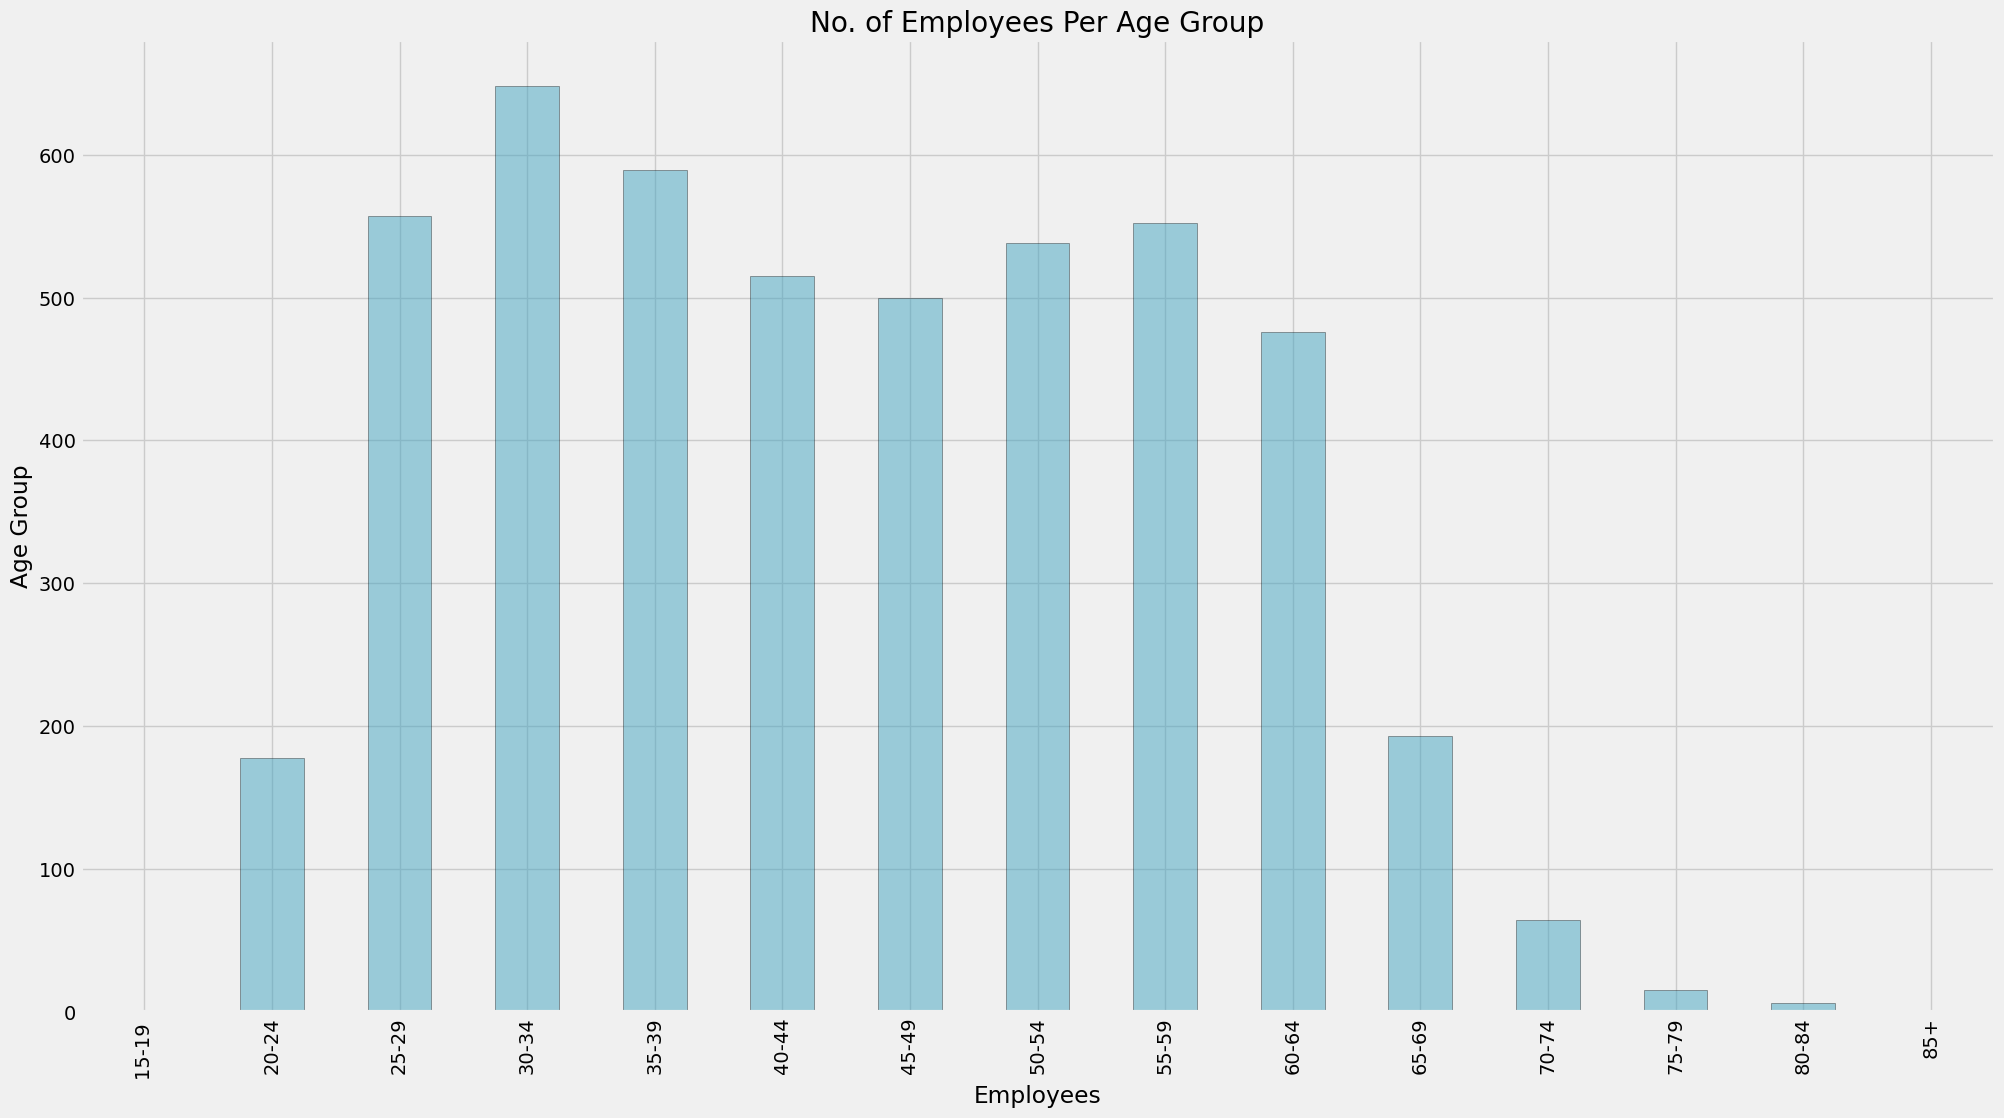

In [76]:
#Age distribution
plt.figure(figsize=(22, 12))
dav_fulltime_emp.groupby('Age_Group').size().plot(kind = 'bar',
                                                  color='#44a5c2', 
                                                  alpha=0.5,
                                                  title='No. of Employees Per Age Group',
                                                  xlabel='Employees',
                                                 ylabel='Age Group',
                                                 edgecolor='black')
plt.style.use('fivethirtyeight')
plt.show()


Average salary of Fulltime employee

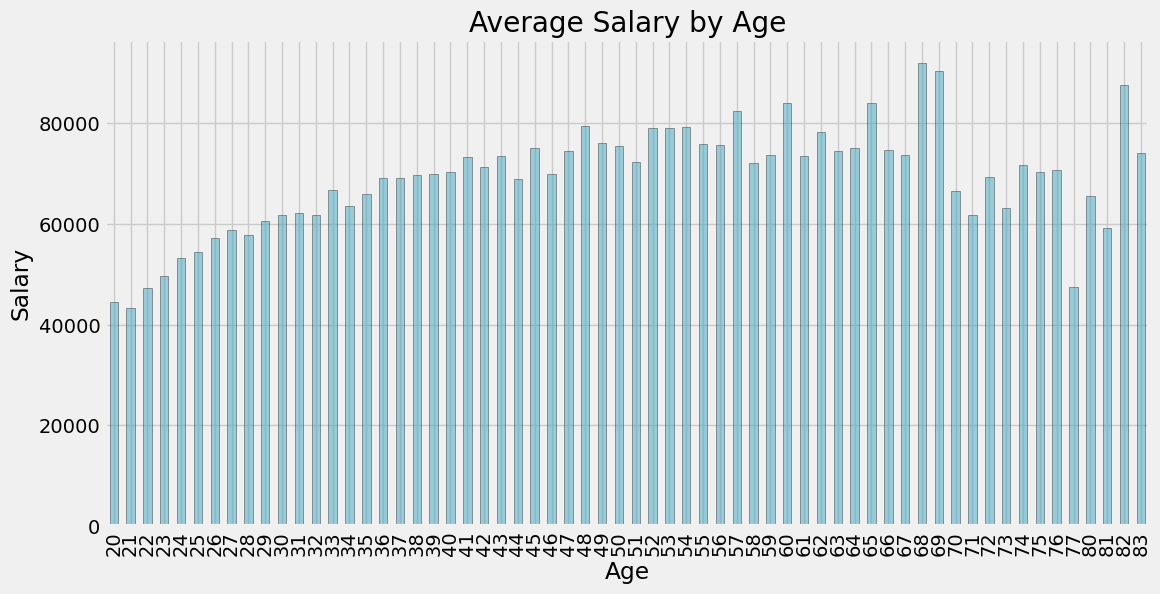

In [77]:
plt.figure(figsize=(12, 6))
ax = (dav_fulltime_emp.groupby('Age')['Annual Salary'].mean().plot(kind = 'bar',color='#44a5c2', alpha=0.5, edgecolor='black'))
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Average Salary by Age')
plt.style.use('fivethirtyeight')
plt.show()

# Gender

In [78]:
#By Gender
emp_by_gender = dav_fulltime_emp['Gender'].value_counts().reset_index()
emp_by_gender

,Gender,count
0,M,2676
1,F,2155


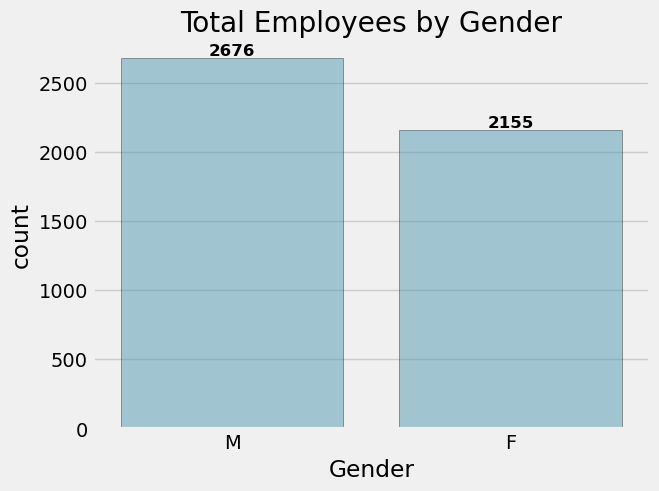

In [79]:
ax = sns.barplot(emp_by_gender, x="Gender", y="count", color='#44a5c2', alpha=0.5, edgecolor='black')
ax.bar_label(ax.containers[0], fontsize=12, weight = 'bold')
ax.set_title("Total Employees by Gender");

In [80]:
dav_fulltime_emp.groupby('Gender')['Annual Salary'].mean().sort_values(ascending = False)

Gender
M    72047.084383
F    67712.967666
Name: Annual Salary, dtype: float64

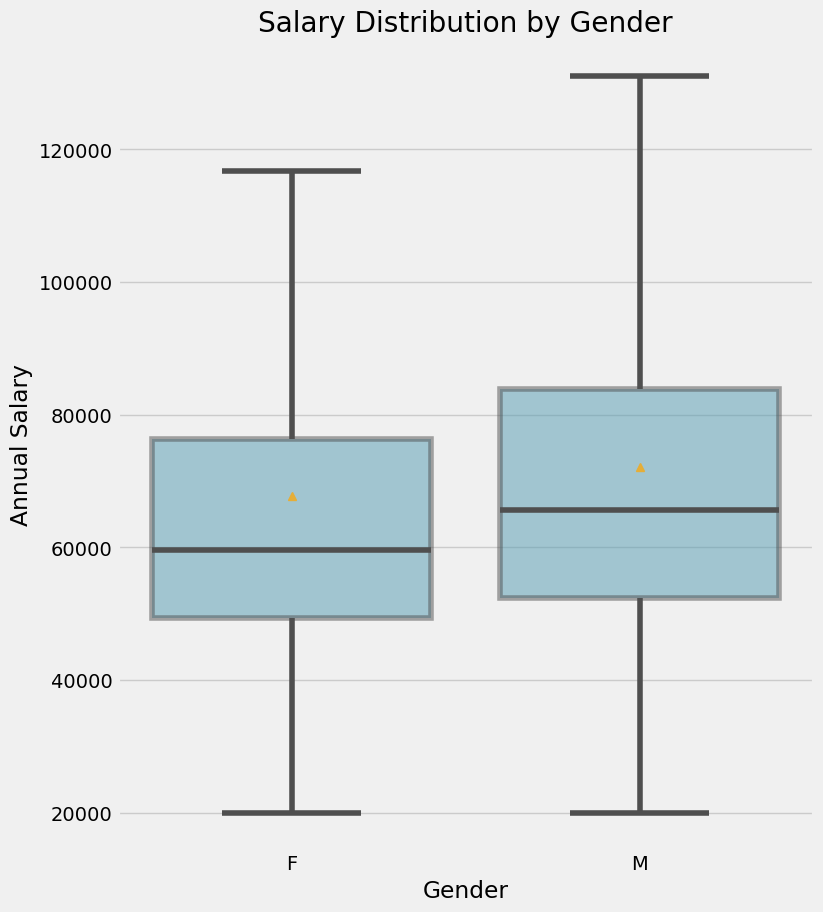

In [81]:
# gov_emp_davidson.groupby('Gender')['Annual Salary'].describe()
plt.figure(figsize=(8, 10))
sns.boxplot(x='Gender', y='Annual Salary', data=dav_fulltime_emp, color='#44a5c2', showfliers=False, showmeans=True,
            boxprops=dict(alpha=.5))
plt.style.use('fivethirtyeight')
plt.title('Salary Distribution by Gender')
plt.show()

In [82]:
dav_fulltime_emp.groupby(['Title', 'Gender'])['Annual Salary'].mean().sort_values(ascending = False).unstack().dropna()

Gender,F,M
Title,,
311 Call Center Specialist Sr,50506.247500,52433.920000
Accountant,68478.334000,75253.160000
Accountant Senior,78497.820000,79854.290000
Accounts Payable Specialist 2,57801.260000,66900.210000
Admin Asst,58304.257222,61384.145000
...,...,...
Warrant Officer 1,50583.344000,55132.652500
Warrant Officer 2,57179.850000,60543.283333
Water Services Asst Manager,94455.680000,113468.170000


In [83]:
# avg_salary_dep = dav_fulltime_emp.groupby(['Current Department', 'Gender'])['Annual Salary'].mean().round(2).unstack().dropna()
# avg_salary_dep

In [84]:
dav_fulltime_emp.head(3)

,index,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County,Current_Year,Age,Age_Group,Started_Year,Year_Of_Service
0,1,OR04,72688.60,7753,Professional Spec,Police,Fulltime,Professionals,F,White,1952,1972-08-18,Y,Davidson,2024,72,70-74,1972,52
1,2,OR07,113468.17,7242,Admin Svcs Mgr,Water Services,Fulltime,Officials and administrators,M,Black,1950,1973-02-26,Y,Davidson,2024,74,70-74,1973,51
2,3,OR09,121002.72,10863,Admin Svcs Division Manager,Metropolitan Council,Fulltime,Officials and administrators,F,White,1956,1974-09-01,Y,Davidson,2024,68,65-69,1974,50


In [85]:
dav_emp_Postion = dav_fulltime_emp.groupby('EEO Job Category Description')['Gender'].value_counts().unstack()

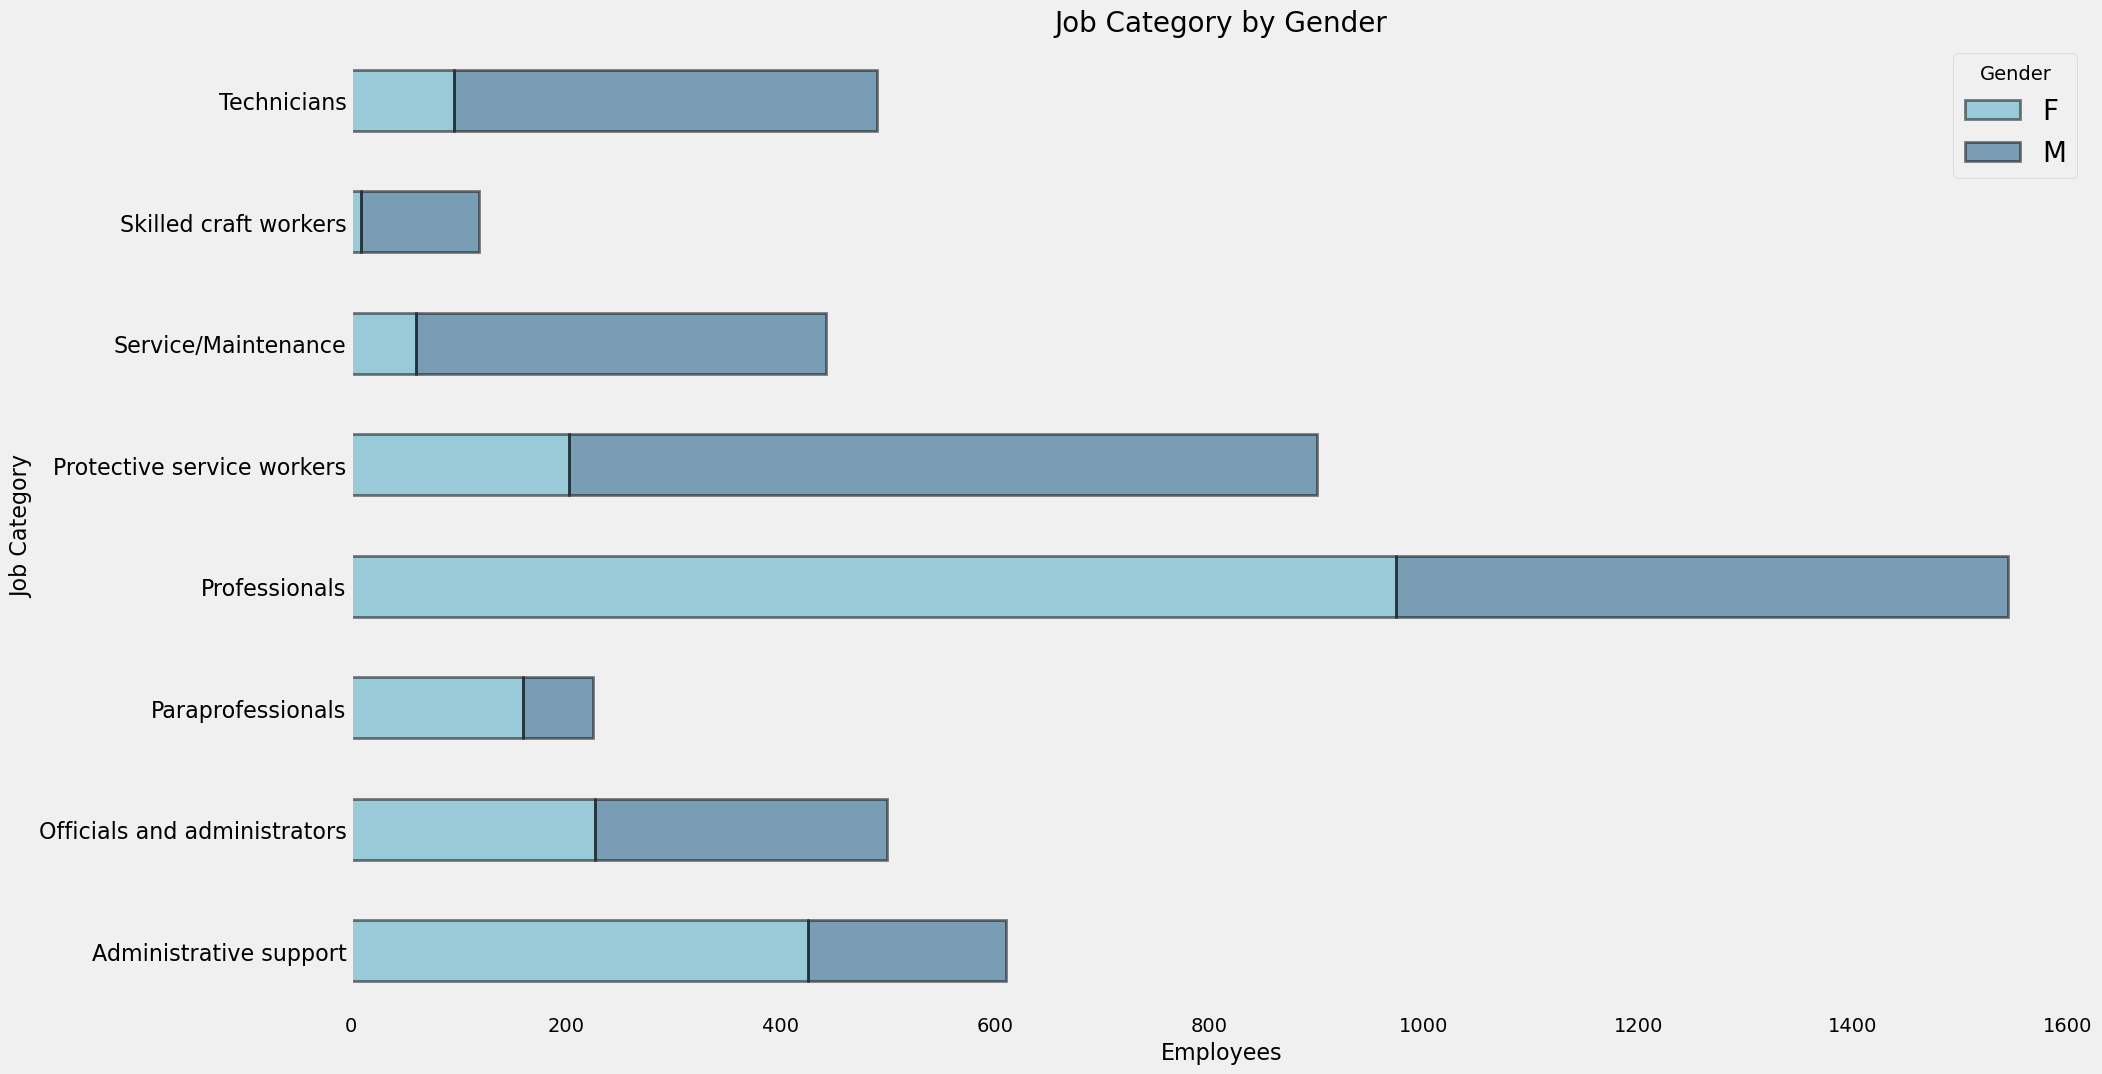

In [86]:
color = ["#44a5c2", "#024b7a"]
dav_emp_Postion.plot(kind = 'barh',figsize = (20,12),stacked =True, color=color,alpha=0.5, edgecolor='black', linewidth=2, grid=False)
plt.title('Job Category by Gender',fontsize =20)
plt.xlabel('Employees',fontsize =16)
plt.ylabel('Job Category',fontsize =16)
plt.yticks(fontsize = 16)
plt.legend(title = 'Gender',fontsize =20)
plt.xticks(rotation = 0)
plt.style.use('fivethirtyeight')
plt.show()

Gender salary by Yeae of service(Experiance)

<Figure size 1200x800 with 0 Axes>

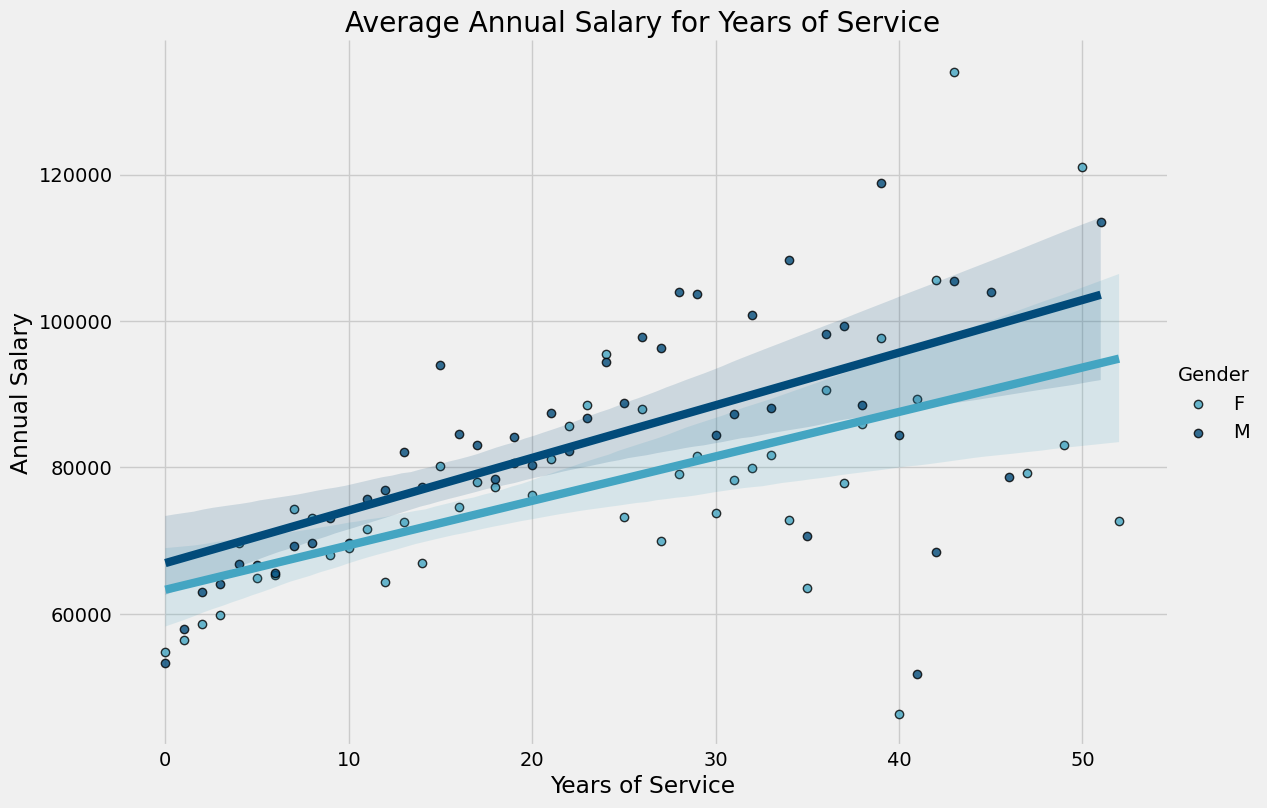

In [87]:
dav_fulltime_emp_years_salary_plot = dav_fulltime_emp.groupby(['Year_Of_Service', 'Gender'])['Annual Salary'].mean().reset_index()

palette = ["#44a5c2", "#024b7a"]
plt.figure(figsize=(12, 8))
sns.lmplot(data=dav_fulltime_emp_years_salary_plot, x='Year_Of_Service', y='Annual Salary',palette=palette, hue='Gender', height=8, aspect=1.5, scatter_kws={'edgecolor':'black'})
plt.title('Average Annual Salary for Years of Service')
plt.xlabel('Years of Service')
plt.show()

In [88]:
dav_fulltime_emp.groupby(['Pay Grade / Step', 'Gender'])['Annual Salary'].mean().round(2).reset_index()

,Pay Grade / Step,Gender,Annual Salary
0,AG01,F,28884.22
1,AG02,M,36998.20
2,AG05,F,49349.63
3,CA01,F,40695.81
4,CA01,M,42660.15
...,...,...,...
241,TS13,M,71309.90
242,TS14,M,74591.67
243,TS15,M,81541.93
244,TS16,F,84303.05


# Race/Ethnicity

In [89]:
dav_fulltime_emp.head(3)

,index,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County,Current_Year,Age,Age_Group,Started_Year,Year_Of_Service
0,1,OR04,72688.60,7753,Professional Spec,Police,Fulltime,Professionals,F,White,1952,1972-08-18,Y,Davidson,2024,72,70-74,1972,52
1,2,OR07,113468.17,7242,Admin Svcs Mgr,Water Services,Fulltime,Officials and administrators,M,Black,1950,1973-02-26,Y,Davidson,2024,74,70-74,1973,51
2,3,OR09,121002.72,10863,Admin Svcs Division Manager,Metropolitan Council,Fulltime,Officials and administrators,F,White,1956,1974-09-01,Y,Davidson,2024,68,65-69,1974,50


In [90]:
emp_by_ethinicity = dav_fulltime_emp['Ethnic Code Description'].value_counts().reset_index()

In [91]:
emp_by_ethinicity.rename(columns = {'count':'Total Employees'},inplace = True)
emp_by_ethinicity

,Ethnic Code Description,Total Employees
0,White,2450
1,Black,1977
2,Hispanic,196
3,Two or more,128
4,Asian,71
5,Native,5
6,Islander,4


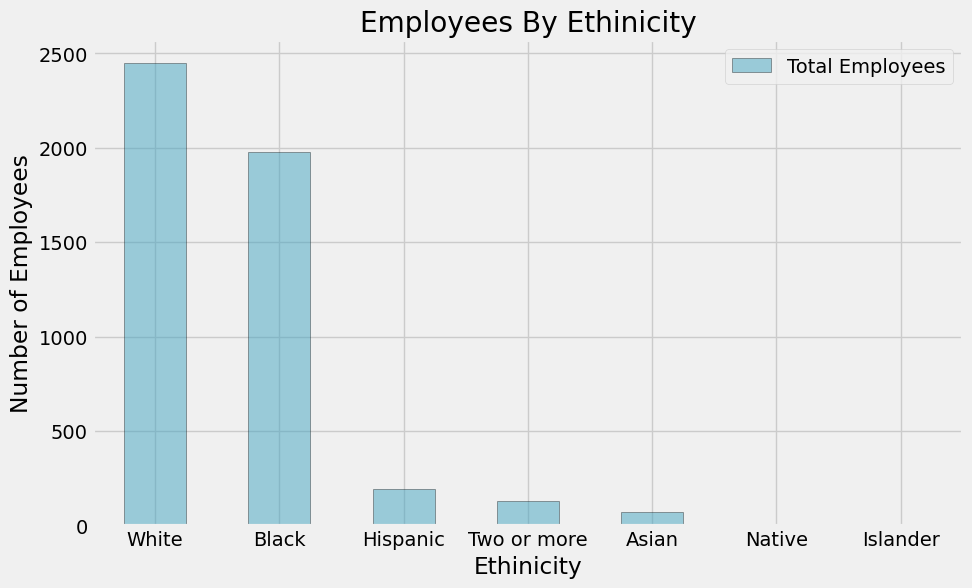

In [92]:
emp_by_ethinicity.plot(kind = 'bar',x= 'Ethnic Code Description',figsize = (10,6),color = '#44a5c2', alpha=0.5, edgecolor='black')
plt.xlabel('Ethinicity')
plt.ylabel('Number of Employees')
plt.title('Employees By Ethinicity')
plt.xticks(rotation = 0)

plt.show()

In [93]:
#Officials and Administrators
dav_fulltime_admins = dav_fulltime_emp[dav_fulltime_emp['EEO Job Category Description'] == 'Officials and administrators']
dav_fulltime_admins

,index,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County,Current_Year,Age,Age_Group,Started_Year,Year_Of_Service
1,2,OR07,113468.17,7242,Admin Svcs Mgr,Water Services,Fulltime,Officials and administrators,M,Black,1950,1973-02-26,Y,Davidson,2024,74,70-74,1973,51
2,3,OR09,121002.72,10863,Admin Svcs Division Manager,Metropolitan Council,Fulltime,Officials and administrators,F,White,1956,1974-09-01,Y,Davidson,2024,68,65-69,1974,50
6,9,OR07,97654.57,7242,Admin Svcs Mgr,Juvenile Court,Fulltime,Officials and administrators,F,Black,1959,1977-10-16,Y,Davidson,2024,65,65-69,1977,47
10,13,OR07,113468.17,11272,Transportation Superintendent,NDOT,Fulltime,Officials and administrators,M,White,1960,1978-10-16,Y,Davidson,2024,64,60-64,1978,46
12,17,FD11,142808.86,10712,Fire Commander,Fire,Fulltime,Officials and administrators,M,White,1955,1979-10-16,Y,Davidson,2024,69,65-69,1979,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758,10642,ST09,50452.95,7732,Compliance Inspector 2,NDOT,Fulltime,Officials and administrators,F,Black,1979,2024-03-04,N,Davidson,2024,45,45-49,2024,0
4762,10647,OR07,92000.00,7242,Admin Svcs Mgr,NDOT,Fulltime,Officials and administrators,M,White,1994,2024-03-04,Y,Davidson,2024,30,30-34,2024,0
4768,10656,OR09,94249.13,10129,Planning Mgr 1,Planning Commission,Fulltime,Officials and administrators,M,White,1985,2024-03-04,Y,Davidson,2024,39,35-39,2024,0
4779,10680,OR08,87529.74,7234,Information Systems Advisor 1,Information Technology Services,Fulltime,Officials and administrators,M,White,1985,2024-03-16,Y,Davidson,2024,39,35-39,2024,0


In [94]:
#save it to csv file
#dav_fulltime_admins.to_csv('dav_fulltime_admins.csv',index=False)

In [95]:
#fix and use it latter
admins_ethincity = dav_fulltime_admins.groupby('EEO Job Category Description')['Ethnic Code Description'].value_counts().reset_index()
admins_ethincity.rename(columns = {'count':'Total Employees'},inplace = True)
admins_ethincity

,EEO Job Category Description,Ethnic Code Description,Total Employees
0,Officials and administrators,White,322
1,Officials and administrators,Black,150
2,Officials and administrators,Asian,10
3,Officials and administrators,Hispanic,10
4,Officials and administrators,Two or more,6
5,Officials and administrators,Native,1


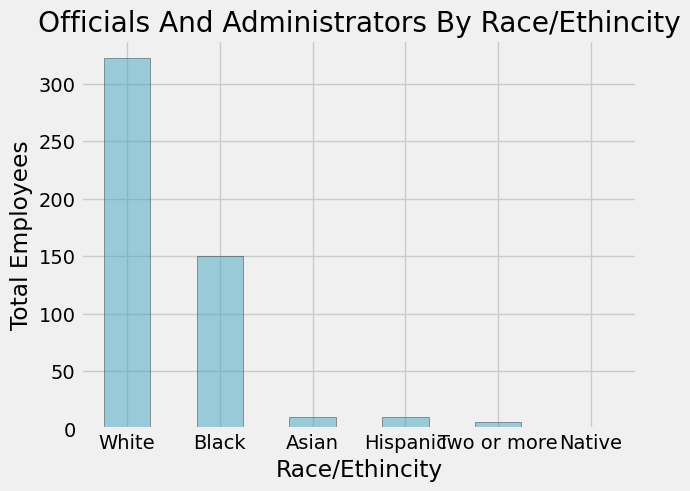

In [96]:
admins_ethincity.plot(kind = 'bar', x = 'Ethnic Code Description',  color = '#44a5c2', alpha=0.5, legend = False, edgecolor='black')
plt.xlabel('Race/Ethincity')
plt.ylabel('Total Employees')
plt.title('Officials And Administrators By Race/Ethincity')
plt.xticks(rotation = 0)

plt.show()

In [97]:
admns_race_salary = dav_fulltime_admins.groupby(['EEO Job Category Description','Ethnic Code Description'])['Annual Salary'].mean().round(2).reset_index()
admns_race_salary

,EEO Job Category Description,Ethnic Code Description,Annual Salary
0,Officials and administrators,Asian,116097.34
1,Officials and administrators,Black,112387.80
2,Officials and administrators,Hispanic,92286.65
3,Officials and administrators,Native,97520.16
4,Officials and administrators,Two or more,96778.82
5,Officials and administrators,White,117570.00


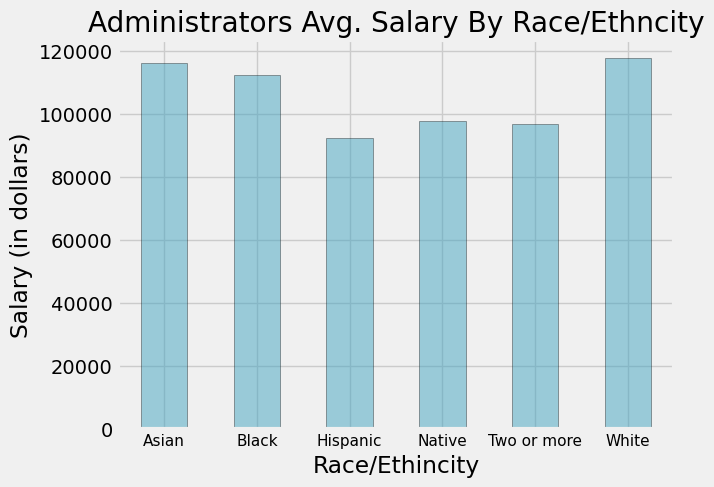

<Figure size 3000x1600 with 0 Axes>

In [98]:
admns_race_salary.plot(kind = 'bar',x = 'Ethnic Code Description',y = 'Annual Salary', color = '#44a5c2', alpha=0.5, legend = False, edgecolor='black')
plt.xlabel('Race/Ethincity')
plt.ylabel('Salary (in dollars)')

plt.xticks(rotation = 0,fontsize = 11)
plt.title('Administrators Avg. Salary By Race/Ethncity')
plt.figure(figsize=(30, 16))
plt.show()


In [99]:
gov_emp.groupby('Pay Grade / Step').size().sort_values(ascending  = False)#['Annual Salary'].mean().round(2).reset_index()

Pay Grade / Step
NS        840
PS03B     590
ST08      450
OR06      438
ST07      438
         ... 
MAC12B      1
MM          1
PD          1
PK04        1
VM          1
Length: 191, dtype: int64

Experience vs. Salary Analysis

In [100]:
service_vs_salary = dav_fulltime_emp.groupby(['Pay Grade / Step', 'Year_Of_Service'])['Annual Salary'].mean().reset_index()
service_vs_salary 

,Pay Grade / Step,Year_Of_Service,Annual Salary
0,AG01,1,27508.82
1,AG01,2,30259.61
2,AG02,7,36998.20
3,AG05,7,49349.63
4,CA01,0,39520.00
...,...,...,...
1524,TS16,32,81847.62
1525,TS16,33,89437.11
1526,TS16,34,86832.15
1527,TS16,36,89437.11


In [101]:
diversity_by_department =  dav_fulltime_emp.groupby(['Current Department', 'Gender', 'Ethnic Code Description']).size().reset_index(name='Total Employees')
print(diversity_by_department)


         Current Department Gender Ethnic Code Description  Total Employees
0    Agricultural Extension      F                   Black                1
1    Agricultural Extension      F                   White                2
2    Agricultural Extension      M                   White                1
3           Arts Commission      F                   Black                4
4           Arts Commission      F                   White                4
..                      ...    ...                     ...              ...
307          Water Services      M                   Black              239
308          Water Services      M                Hispanic                8
309          Water Services      M                Islander                1
310          Water Services      M             Two or more                8
311          Water Services      M                   White              135

[312 rows x 4 columns]


In [102]:
 dav_fulltime_emp.groupby([ 'Gender', 'Ethnic Code Description'])['Year_Of_Service'].value_counts()

Gender  Ethnic Code Description  Year_Of_Service
F       Asian                    1                  9
                                 2                  4
                                 0                  3
                                 5                  3
                                 3                  2
                                                   ..
M       White                    43                 3
                                 46                 3
                                 35                 2
                                 45                 2
                                 41                 1
Name: count, Length: 312, dtype: int64